<div style="text-align: center;"><div  style="color:#7f0000; font-size:30px; font-weight:bold; line-height:40px;">Task 1 -Prediction using Supervised ML</div></div>
<div style="text-align: center; color:#006666"><strong>Owner: </strong>Rishikesh Surve</div>
<div style="text-align: center; color:#006666"><strong>Mail ID: </strong>rishisurve04@gmail.com</div>
<div style="text-align: center; color:#006666"><strong>Linkedin ID: </strong>linkedin.com/in/rishikesh-surve-6336b615b</div>

<b>Data Description:</b>
<br>What will be predicted score if a student studies for 9.25 hrs/ day?.</br>

<b> Step 1: Importing necessary libraries</b>

In [1]:
#manipulating data
import pandas as pd 

#mathematical function
import numpy as np

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")
import os as os

<b> Step 2: Loading Data </b>

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print(data)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [3]:
#to see the top 5 rows of data
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#to see bottom 5 rows of data
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#to check the null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#to see total no. of rows and columns 
data.shape

(25, 2)

In [7]:
#to see the info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


<b/>Target variable is scores as per data description

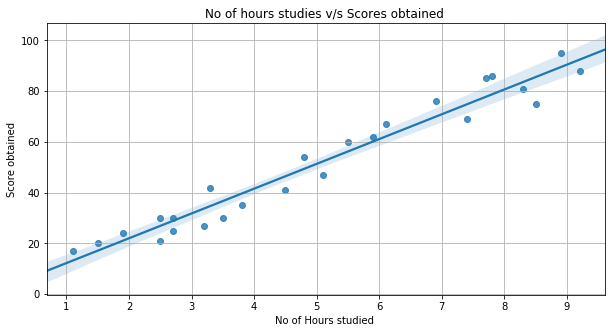

In [8]:
#visualise the data
plt.figure(figsize=(10,5))
sns.regplot(x="Hours", y="Scores", data=data )
plt.xlabel("No of Hours studied ")
plt.ylabel("Score obtained")
plt.title("No of hours studies v/s Scores obtained ")
plt.grid()
plt.show()

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<b> Step 3: Building Model </b>

In [10]:
X = data[["Hours"]]
y= data[["Scores"]]

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8,random_state=100)
X_train.shape,X_test.shape, y_train.shape,y_test.shape

((20, 1), (5, 1), (20, 1), (5, 1))

In [12]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr=lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
X_test

,Hours
9,2.7
22,3.8
13,3.3
11,5.9
5,1.5


In [13]:
y_pred

array([[28.54512294],
       [39.36411177],
       [34.44638957],
       [60.01854497],
       [16.74258969]])

<b> visualization for Train, Test and Predicted score </b>

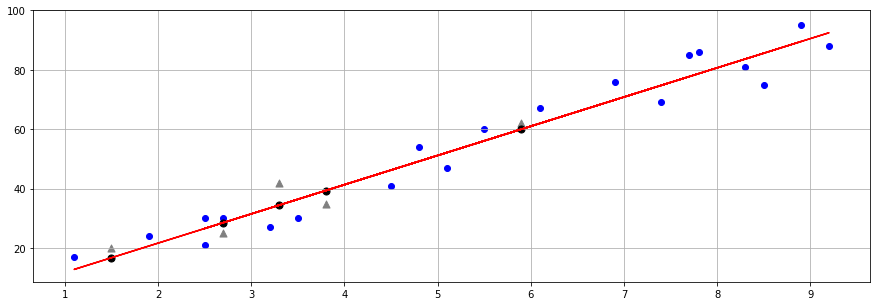

In [14]:
plt.figure(figsize = (15,5))
plt.plot(X_train, lr.predict(X_train),  color='red')  # beacuse it have only  Train data - Regression line (eq can also be used)
plt.scatter(X_train, y_train,  color='blue')
plt.scatter(X_test, y_test,  color='grey',marker="^" , s= 50)
plt.scatter(X_test, lr.predict(X_test),  color='black', s=50)    # y_pred = lm.predict(test)  -- Test  data 
plt.grid()
plt.show()

In [15]:
lr.coef_

array([[9.83544438]])

In [16]:
lr.intercept_

array([1.98942311])

In [17]:
eq_y=lr.intercept_+ lr.coef_*9.25
eq_y

array([[92.96728365]])

In [18]:
from sklearn.metrics import mean_absolute_error,r2_score

In [19]:
rsq=r2_score(y_test,y_pred)
print("R square : ",round(rsq,3))
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error : ",round(mae,3))

R square :  0.905
Mean absolute error :  4.14
